# 非线性假设

线性回归和逻辑回归的缺点在于：当特征太多时，计算的负荷会很大。

例如：

![](https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/5316b24cd40908fb5cb1db5a055e4de5.png)

当我们使用$x_1$, $x_2$ 的多次项式进行预测时，我们可以应用的很好。 之前我们已经看到过，使用非线性的多项式项，能够帮助我们建立更好的分类模型。假设我们有非常多的特征，例如大于100个变量，我们希望用这100个特征来构建一个非线性的多项式模型，结果将是数量非常惊人的特征组合，即便我们只采用两两特征的组合$(x_1x_2+x_1x_3+x_1x_4+...+x_2x_3+x_2x_4+...+x_{99}x_{100})$，我们也会有接近5000个组合而成的特征。这对于一般的逻辑回归来说需要计算的特征太多了。

假设我们希望训练一个模型来识别视觉对象（例如识别一张图片上是否是一辆汽车），我们怎样才能这么做呢？一种方法是我们利用很多汽车的图片和很多非汽车的图片，然后利用这些图片上一个个像素的值（饱和度或亮度）来作为特征。

假如我们只选用灰度图片，每个像素则只有一个值（而非 RGB值），我们可以选取图片上的两个不同位置上的两个像素，然后训练一个逻辑回归算法利用这两个像素的值来判断图片上是否是汽车：

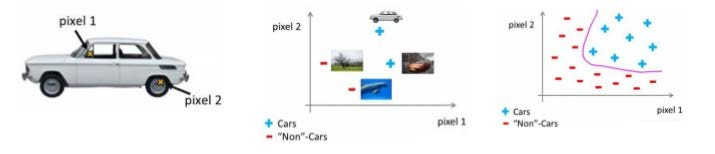

假使我们采用的都是50x50像素的小图片，并且我们将所有的像素视为特征，则会有 2500个特征，如果我们要进一步将两两特征组合构成一个多项式模型，则会有约${{2500}^{2}}/2$个（接近3百万个）特征。普通的逻辑回归模型，不能有效地处理这么多的特征，这时候我们需要神经网络。

# 神经元和大脑

# 模型演示1

为了构建神经网络模型，我们需要首先思考大脑中的神经网络是怎样的？每一个神经元都可以被认为是一个处理单元/神经核（processing unit/Nucleus），它含有许多输入/树突（input/Dendrite），并且有一个输出/轴突（output/Axon）。神经网络是大量神经元相互链接并通过电脉冲来交流的一个网络。

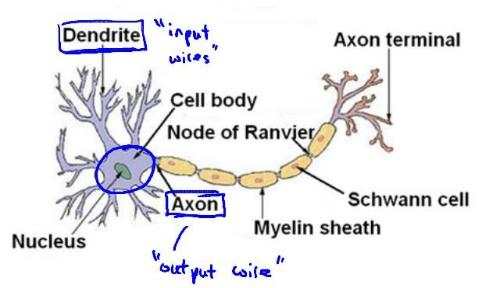

## 神经网络模型

在神经网络模型中，树突相当于我们输入的特征向量$x_1, ..., x_n$，而输出就是我们假设函数的结果。同时，我们会为我们的模型添加$x_0$，$x_0$有时被称做**bias unit**，$x_0$总是等于1。
  
在神经网络模型中，我们的假设函数依然是$h_\theta(x) = \dfrac{1}{1+e^{-\theta^Tx}}$。这个函数有时被称做**sigmoid activation function**。对应的$\theta$被称做权重(weight)

最简单的逻辑激活函数(logitic activation function)如下：

![](https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/c2233cd74605a9f8fe69fd59547d3853.jpg)

通过输入节点(layer 1,$x_0, ..., x_3$)，得到输出节点(output layer $h_\theta{x}$)

而中间的节点我们称做**hidden layers**

![](https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/fbb4ffb48b64468c384647d45f7b86b5.png)

神经网络模型是许多逻辑单元按照不同层级组织起来的网络，每一层的输出变量都是下一层的输入变量（类似于管道）。下图为一个3层的神经网络，第一层成为输入层（Input Layer），最后一层称为输出层（Output Layer），中间一层成为隐藏层（Hidden Layers）。我们为每一层都增加一个偏差单位（bias unit）：



![](https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/8293711e1d23414d0a03f6878f5a2d91.jpg)

## 表示方法


$\begin{align*}& a_i^{(j)} = \text{"activation" of unit $i$ in layer $j$} \newline& \Theta^{(j)} = \text{matrix of weights controlling function mapping from layer $j$ to layer $j+1$}\end{align*}$

$a_i^{(j)}$表示：第j层，第i个激活单元  
$\Theta^{(j)}$表示：从第j层映射到第j+1层时的权重的矩阵。如，$\Theta^{(1)}$表示从第一层映射到第二层的权重矩阵。

$\begin{bmatrix}x_0 \newline x_1 \newline x_2 \newline x_3\end{bmatrix}\rightarrow\begin{bmatrix}a_1^{(2)} \newline a_2^{(2)} \newline a_3^{(2)} \newline \end{bmatrix}\rightarrow h_\theta(x)$

$\begin{align*} a_1^{(2)} = g(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3) \newline a_2^{(2)} = g(\Theta_{20}^{(1)}x_0 + \Theta_{21}^{(1)}x_1 + \Theta_{22}^{(1)}x_2 + \Theta_{23}^{(1)}x_3) \newline a_3^{(2)} = g(\Theta_{30}^{(1)}x_0 + \Theta_{31}^{(1)}x_1 + \Theta_{32}^{(1)}x_2 + \Theta_{33}^{(1)}x_3) \newline h_\Theta(x) = a_1^{(3)} = g(\Theta_{10}^{(2)}a_0^{(2)} + \Theta_{11}^{(2)}a_1^{(2)} + \Theta_{12}^{(2)}a_2^{(2)} + \Theta_{13}^{(2)}a_3^{(2)}) \newline \end{align*}$

也就是说，我们可以通过参数矩阵(这里是3x4)来得到我们的激活单元。上面进行的讨论中只是将特征矩阵中的一行（一个训练实例）喂给了神经网络，我们需要将整个训练集都喂给我们的神经网络算法来学习模型。

我们可以知道：每一个$a$都是由上一层所有的$x$和每一个$x$所对应的$\Theta$决定的

（我们把这样从左到右的算法称为前向传播算法( **FORWARD PROPAGATION **)）

## 权重的维度

对应(激活单元)的每一层，都有自己的权重(weight $\Theta^{(j)}$)，这些权重矩阵的维度由如下规则决定的：

如果神经网络第j层有$s_j$个节点，第$j + 1$层有$s_{j+1}$个激活单元，则$\Theta^{j}$的维度为$s_{j+1} \times (s_j + 1)$。(+1是因为上一层多了个bias units)

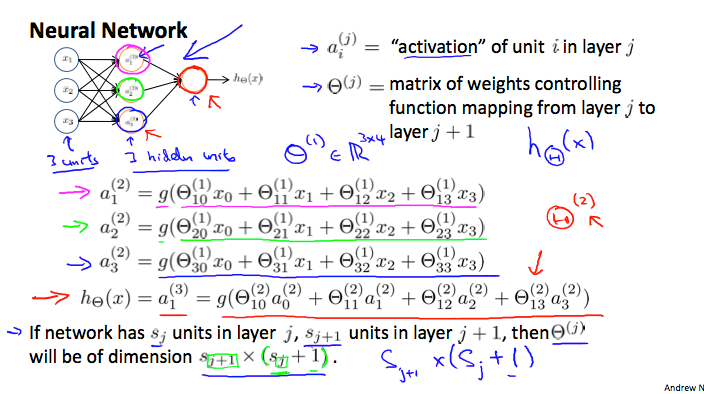

如上图所示，第2层有3个激活单元，第1层有3个节点，所以$dim(\Theta^{(i)}) = 3 \times (3 + 1) = 3 \times 4$

# 模型演示2

神经网络需要**不断迭代**，通过每一层的过滤最终得到我们想要的结果

$\begin{align*} a_1^{(2)} = g(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3) \newline a_2^{(2)} = g(\Theta_{20}^{(1)}x_0 + \Theta_{21}^{(1)}x_1 + \Theta_{22}^{(1)}x_2 + \Theta_{23}^{(1)}x_3) \newline a_3^{(2)} = g(\Theta_{30}^{(1)}x_0 + \Theta_{31}^{(1)}x_1 + \Theta_{32}^{(1)}x_2 + \Theta_{33}^{(1)}x_3) \newline h_\Theta(x) = a_1^{(3)} = g(\Theta_{10}^{(2)}a_0^{(2)} + \Theta_{11}^{(2)}a_1^{(2)} + \Theta_{12}^{(2)}a_2^{(2)} + \Theta_{13}^{(2)}a_3^{(2)}) \newline \end{align*}$

由上面的公式我们可以看出：第i+1层是在第i层的结果上进行的。为了让公式简化，我们用如下的符合表示：

$\begin{align*}a_1^{(2)} = g(z_1^{(2)}) \newline a_2^{(2)} = g(z_2^{(2)}) \newline a_3^{(2)} = g(z_3^{(2)}) \newline \end{align*}$

$z_k^{(2)} = \Theta_{k,0}^{(1)}x_0 + \Theta_{k,1}^{(1)}x_1 + \cdots + \Theta_{k,n}^{(1)}x_n$

用向量来表示x、$z^j$：

\begin{align*}x = \begin{bmatrix}x_0 \newline x_1 \newline\cdots \newline x_n\end{bmatrix} &z^{(j)} = \begin{bmatrix}z_1^{(j)} \newline z_2^{(j)} \newline\cdots \newline z_n^{(j)}\end{bmatrix}\end{align*}

我们把x设置为第一层，即$x=a^{(1)}$，则能得到如下等式：

$z^{(j)} = \theta^{(j - 1)}a^{(j-1)}$

进而得到：  
$a^{(j)} = g(z^{(j)})$


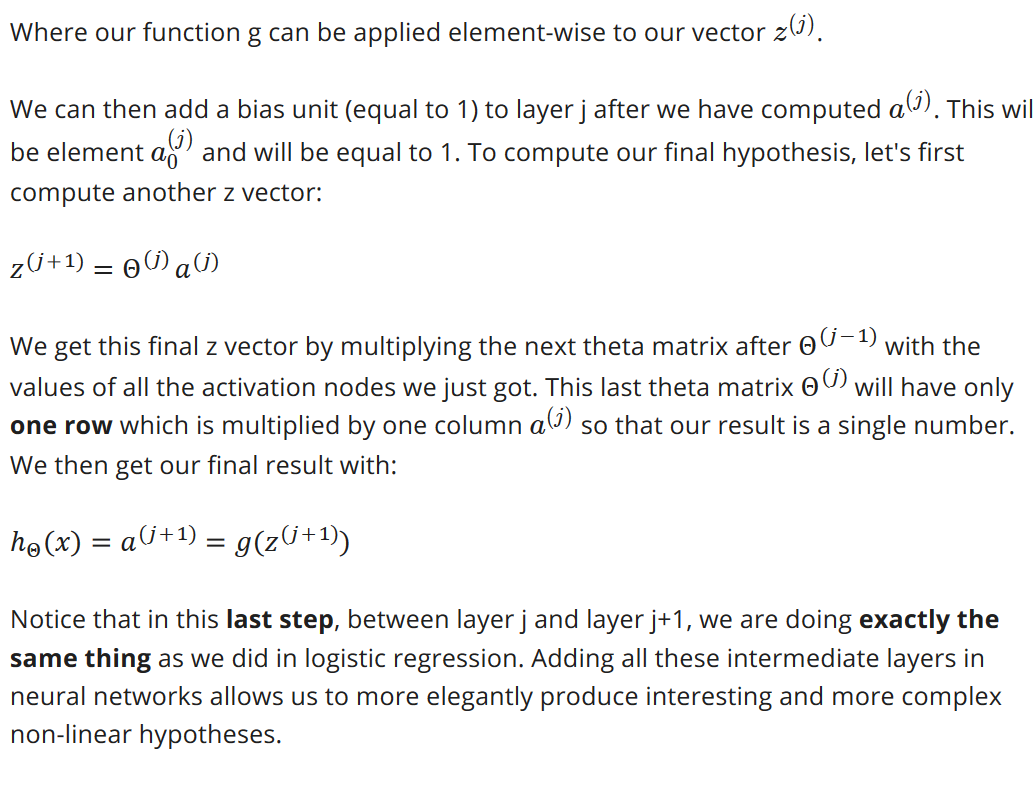

其实神经网络就像是logistic regression，只不过我们把logistic regression中的输入向量$\left[ x_1\sim {x_3} \right]$ 变成了中间层的$\left[ a_1^{(2)}\sim a_3^{(2)} \right]$, 即: $h_\theta(x)=g\left( \Theta_0^{\left( 2 \right)}a_0^{\left( 2 \right)}+\Theta_1^{\left( 2 \right)}a_1^{\left( 2 \right)}+\Theta_{2}^{\left( 2 \right)}a_{2}^{\left( 2 \right)}+\Theta_{3}^{\left( 2 \right)}a_{3}^{\left( 2 \right)} \right)$ 我们可以把$a_0, a_1, a_2, a_3$看成更为高级的特征值，也就是$x_0, x_1, x_2, x_3$的进化体，并且它们是由 $x$与$\theta$决定的，因为是梯度下降的，所以$a$是变化的，并且变得越来越厉害，所以这些更高级的特征值远比仅仅将 $x$次方厉害，也能更好的预测新数据。 这就是神经网络相比于逻辑回归和线性回归的优势。

# Examples and Intuition1

## AND

应用神经网络的一个简单例子是预测$x_1$ AND  $x_2$(注意：**AND**是逻辑操作符)

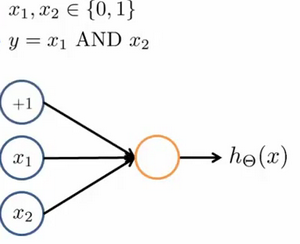

$\begin{align*}\begin{bmatrix}x_0 \newline x_1 \newline x_2\end{bmatrix} \rightarrow\begin{bmatrix}g(z^{(2)})\end{bmatrix} \rightarrow h_\Theta(x)\end{align*}$

($x_0 = 1$)

假设我们把theta设为如下值：
$\Theta^{(1)} =\begin{bmatrix}-30 & 20 & 20\end{bmatrix}$

我们的输出函数$h_\theta(x)$即为：$h_\Theta(x)=g\left( -30+20x_1+20x_2 \right)$

而$g(x)$的函数图像为：

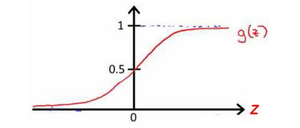

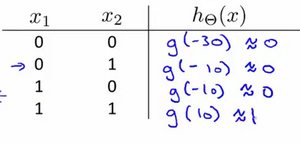

所以我们有：$h_\Theta(x) \approx \text{x}_1 \text{AND} , \text{x}_2$

## OR

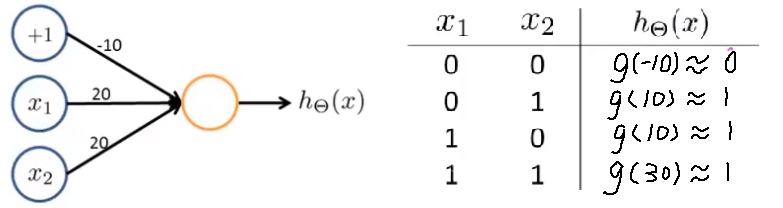

## NOT

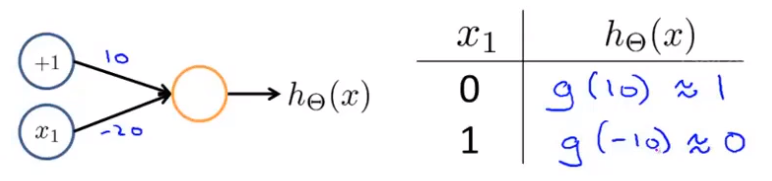

## XNOR

我们可以利用神经元来组合成更为复杂的神经网络以实现更复杂的运算。例如我们要实现XNOR 功能（输入的两个值必须一样，均为1或均为0），即 $\text{XNOR}=( \text{x}_1, \text{AND}, \text{x}_2 ), \text{OR} \left( \left( \text{NOT}, \text{x}_1 \right) \text{AND} \left( \text{NOT}, \text{x}_2 \right) \right)​$ 首先构造一个能表达$\left( \text{NOT}, \text{x}_1 \right) \text{AND} \left( \text{NOT}, \text{x}_2 \right)​$部分的神经元：



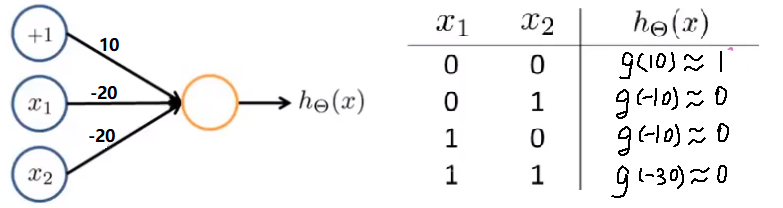

然后将表示 AND 的神经元和表示$\left( \text{NOT}, \text{x}_1 \right) \text{AND} \left( \text{NOT}, \text{x}_2 \right)​$的神经元以及表示 OR 的神经元进行组合：

![](https://raw.githubusercontent.com/fengdu78/Coursera-ML-AndrewNg-Notes/master/images/432c906875baca78031bd337fe0c8682.png)

我们就得到了一个能实现 $\text{XNOR}$ 运算符功能的神经网络。

按这种方法我们可以逐渐构造出越来越复杂的函数，也能得到更加厉害的特征值。

这就是神经网络的厉害之处。

# Multiclass Classification

如果我们要把数据分为很多类，(例如在同一张图片，我们即想区分出哪些是汽车，哪些是行人)这就需要用到我们的多元分类器。

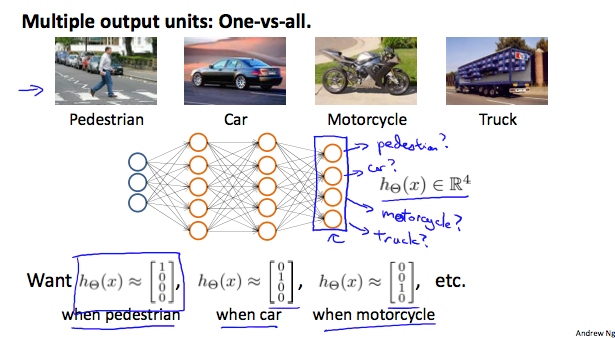

其实，我们只需要在原有的基础上输出更多的假设函数值，我们就能得到不同的分类。

我们把结果用y来接收：


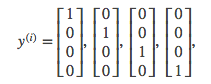

每一个$y^{(i)}$代表不同分类。

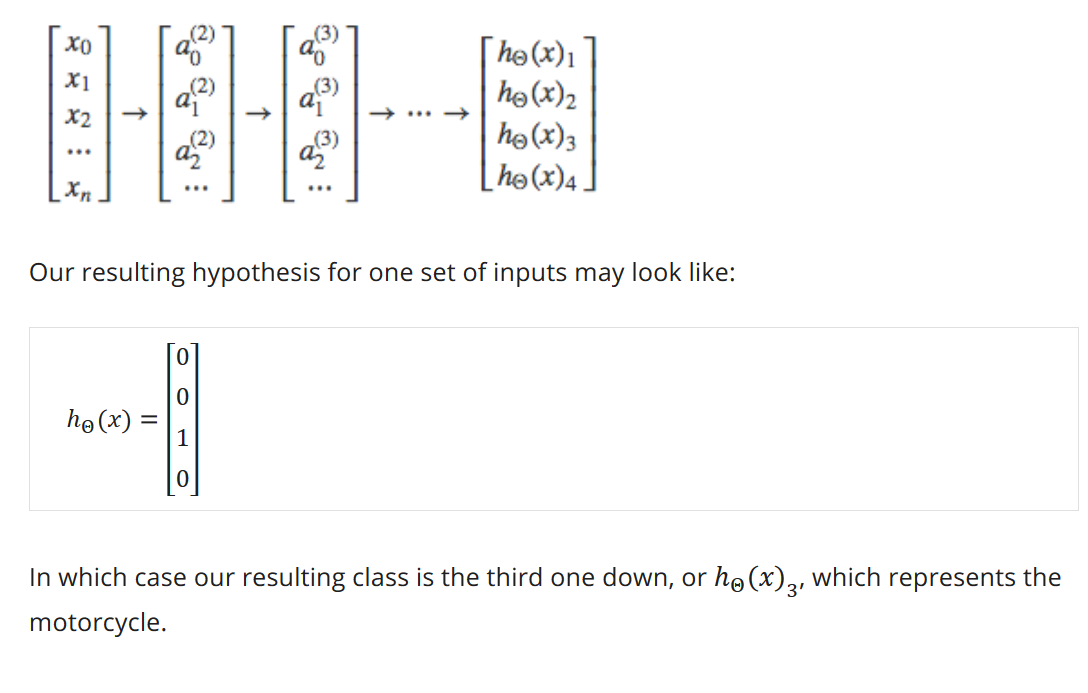